In [1]:
import eclib.datareader as dr
from ecliblight import processing, calculation
import matplotlib.pyplot as plt

In [2]:
input_data = './test_data/imces/IMCES_M40_A40_*.nc'
start = '2024-08-18 01:00:00'
stop = '2024-08-20 01:00:00'

# input_data = './test_data/kgd/PIO_A36_*.nc'
# start = '2023-11-01 00:00:00'
# stop = '2023-11-04 00:00:00'

# input_data = './test_data/msu/MSU_A3_*.nc'
# start = '2021-08-01 00:00:00'
# stop = '2021-08-04 00:00:00'

step = 30

In [3]:
%%time
df = dr.read_all_files(func=dr.nc_to_df, files_pattern=input_data)
df.rename(columns={'temp': 't'}, inplace=True)

CPU times: user 544 ms, sys: 348 ms, total: 891 ms
Wall time: 1.19 s


In [4]:
%%time 
df1 = processing(df, step, start, stop)

CPU times: user 59.8 s, sys: 1.35 s, total: 1min 1s
Wall time: 1min


In [5]:
%%time
df_moments = calculation(df, step, start, stop)
df1_moments = calculation(df1, step, start, stop)

CPU times: user 36.6 s, sys: 4.46 s, total: 41.1 s
Wall time: 42.2 s


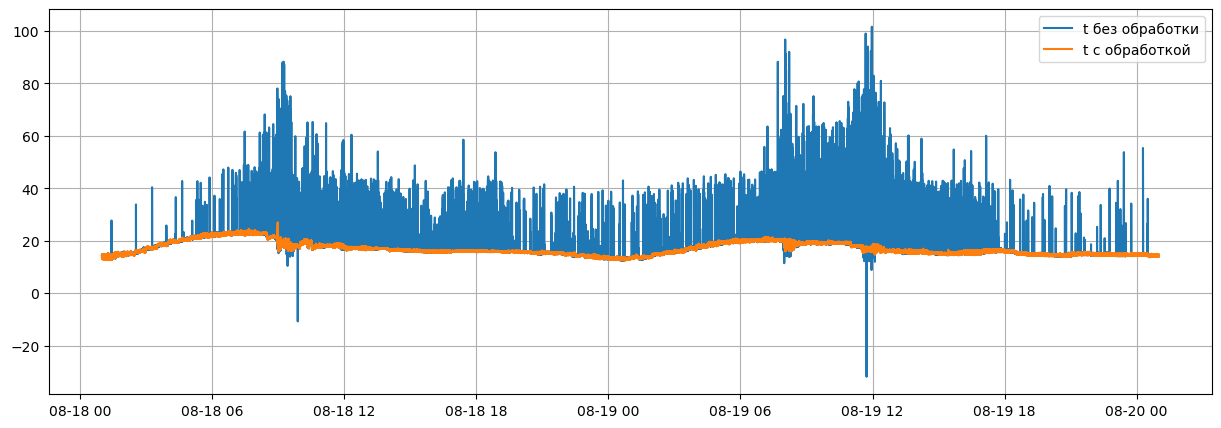

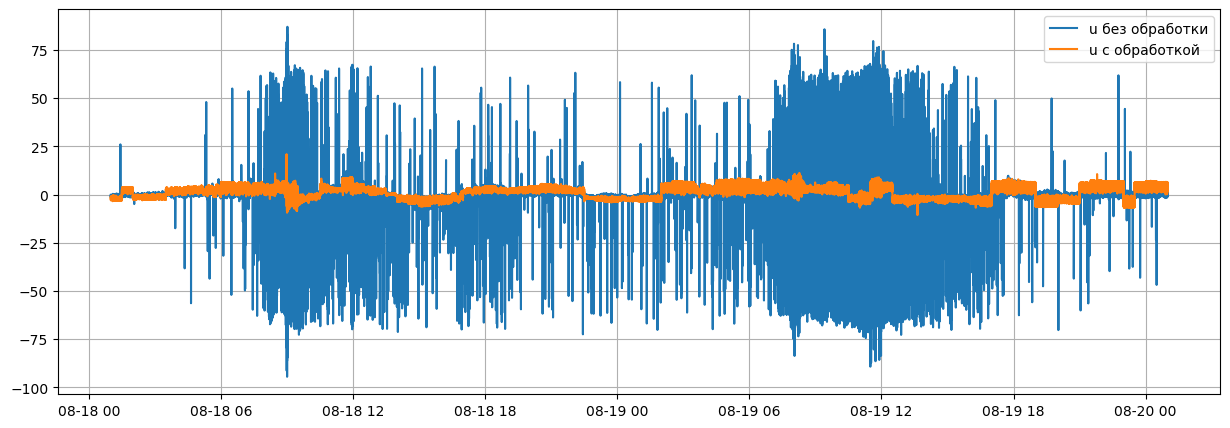

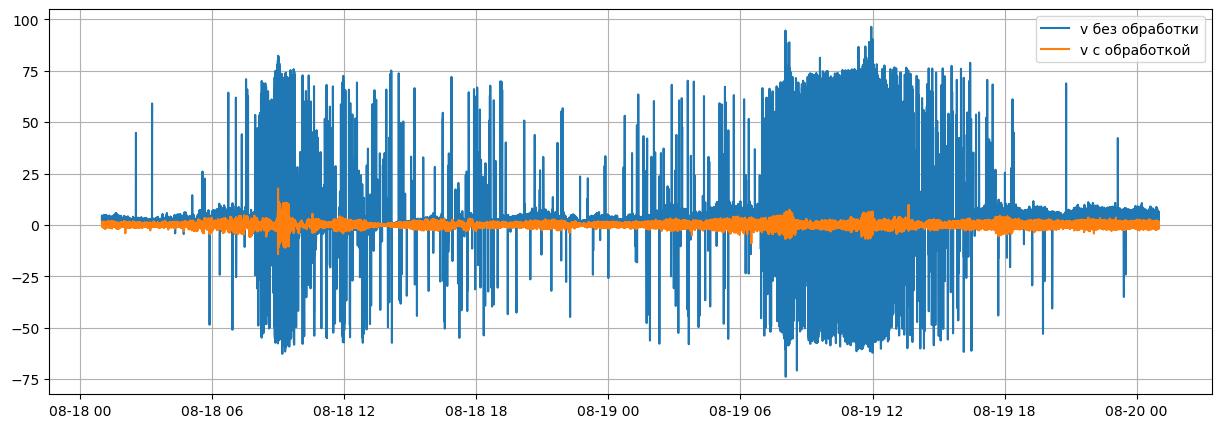

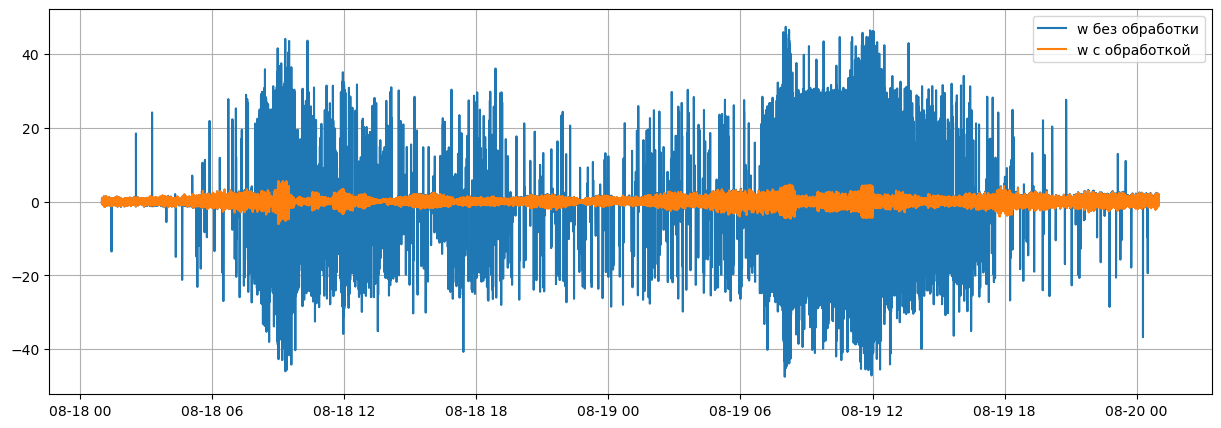

In [6]:
for var_name in df1:
    plt.figure(figsize=(15,5))
    plt.plot(df[var_name], label = f'{var_name} без обработки')
    plt.plot(df1[var_name], label = f'{var_name} с обработкой')
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()

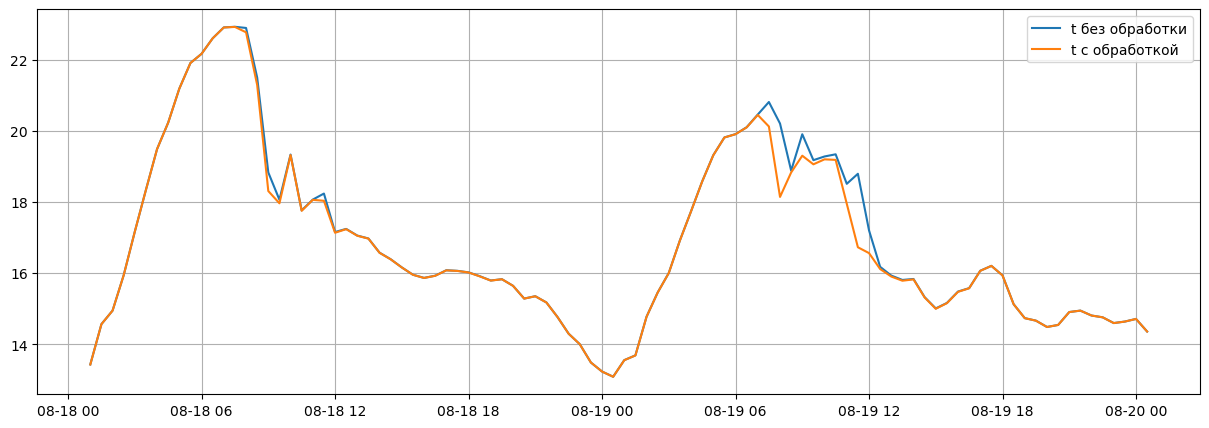

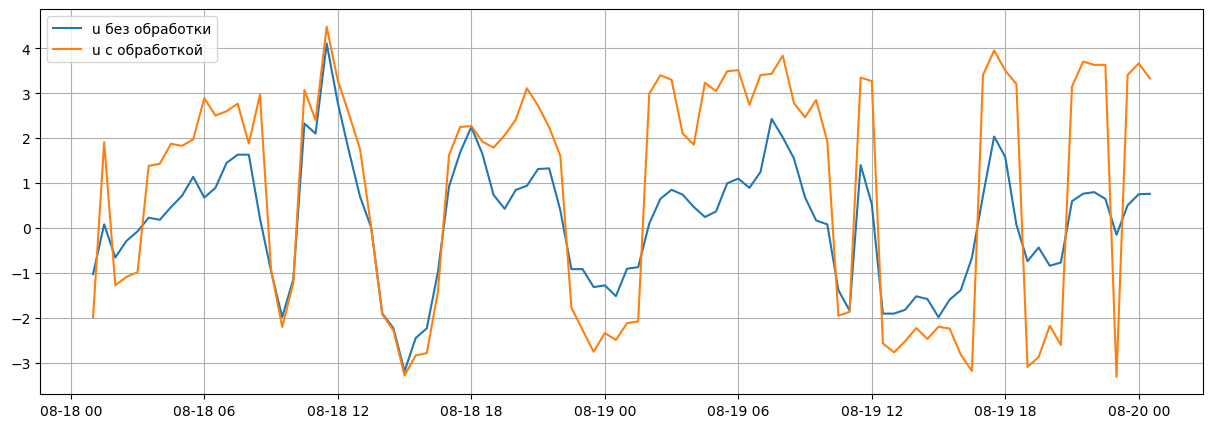

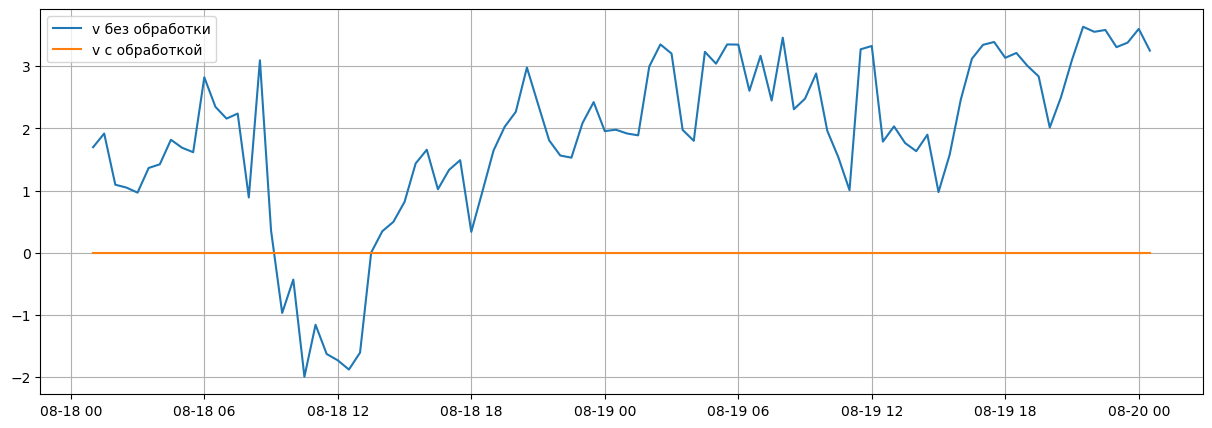

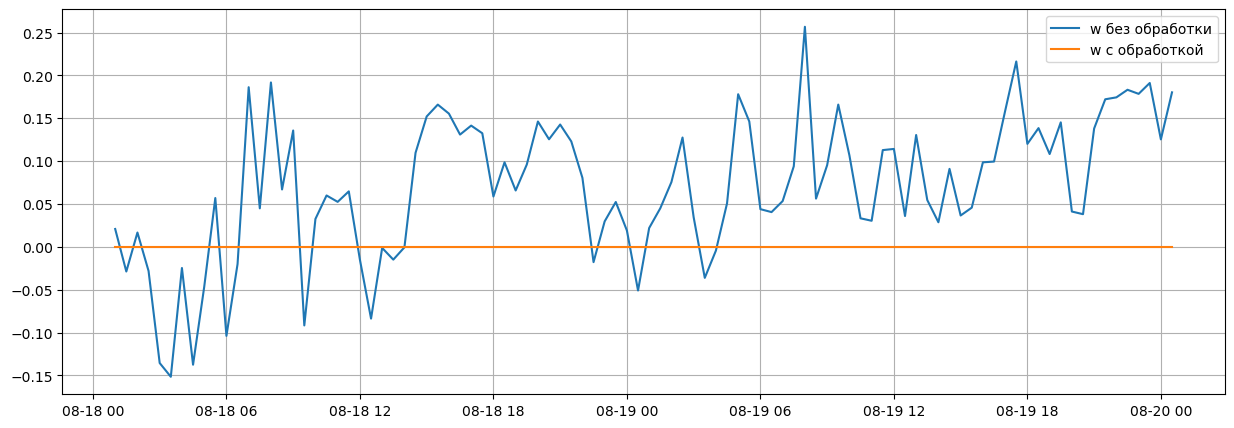

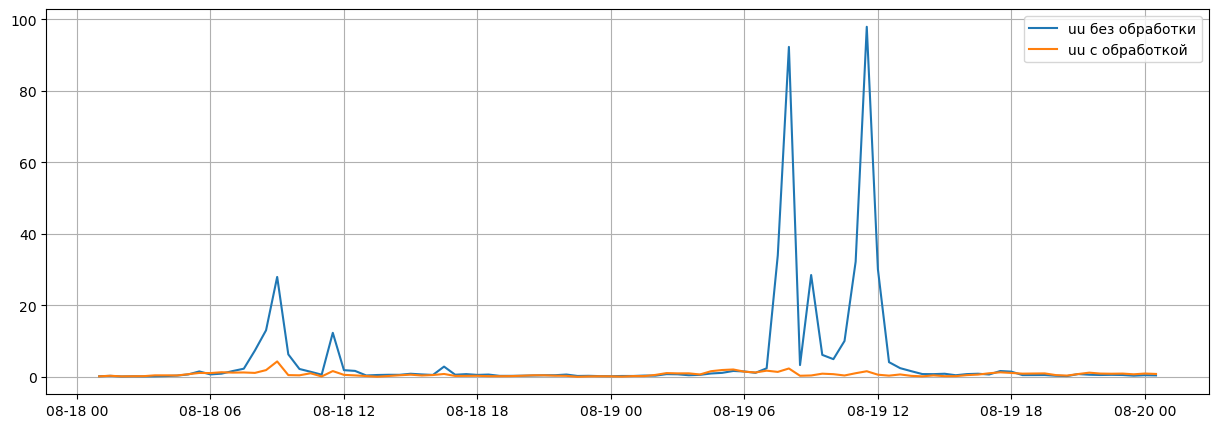

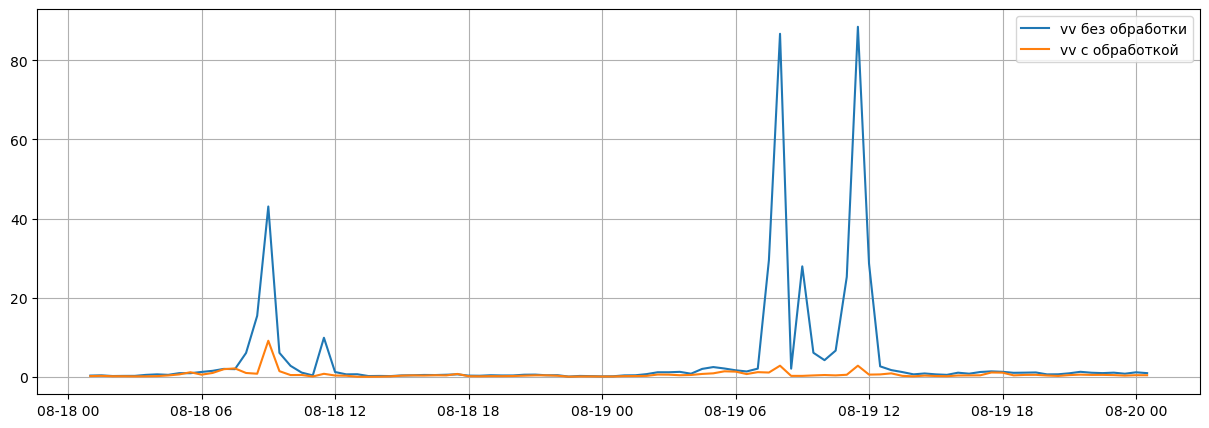

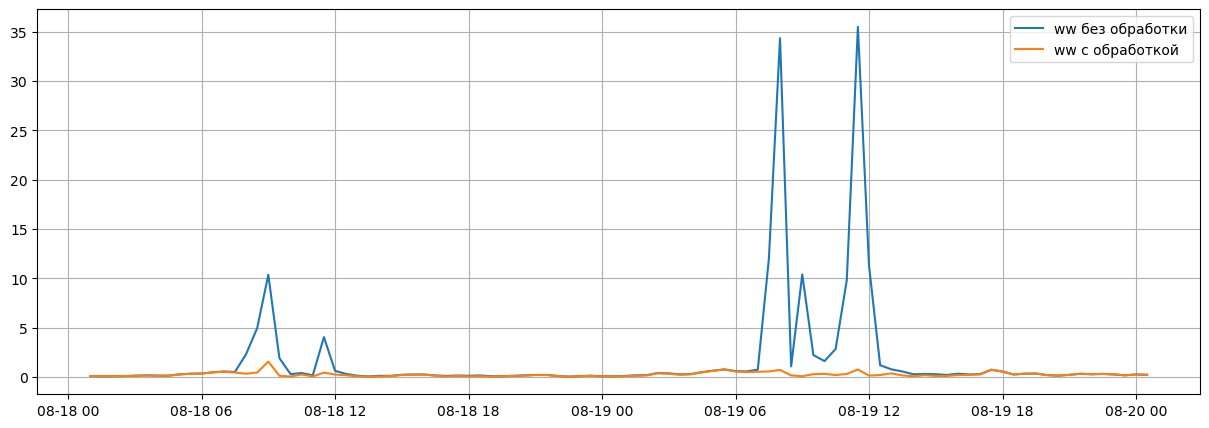

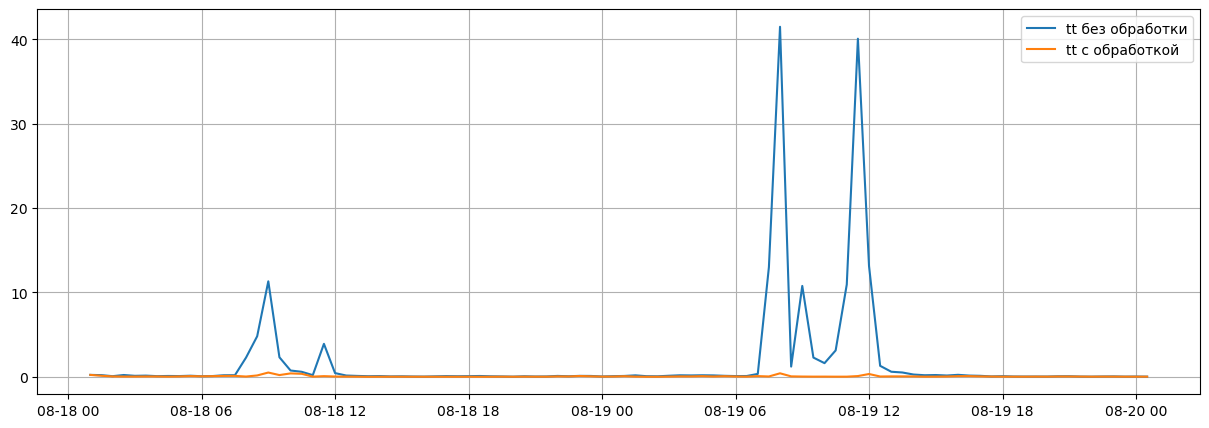

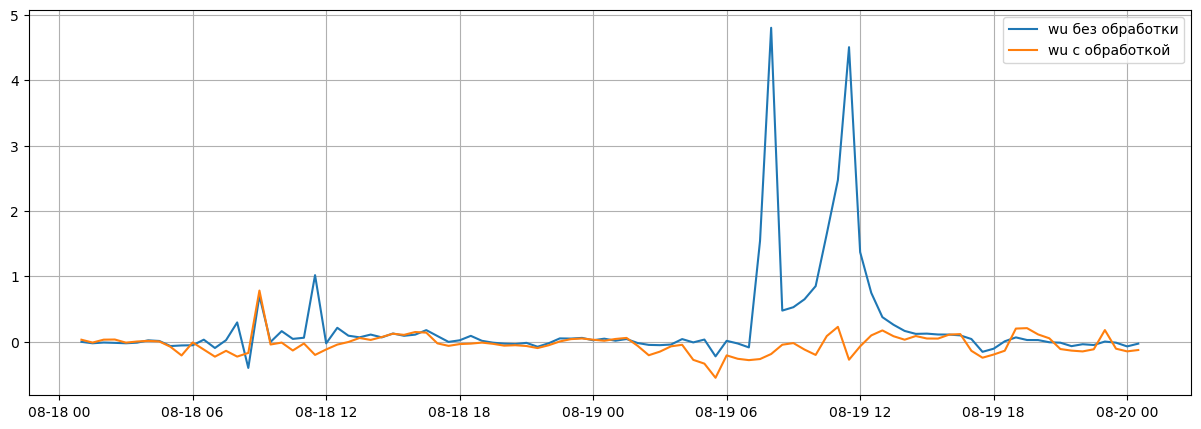

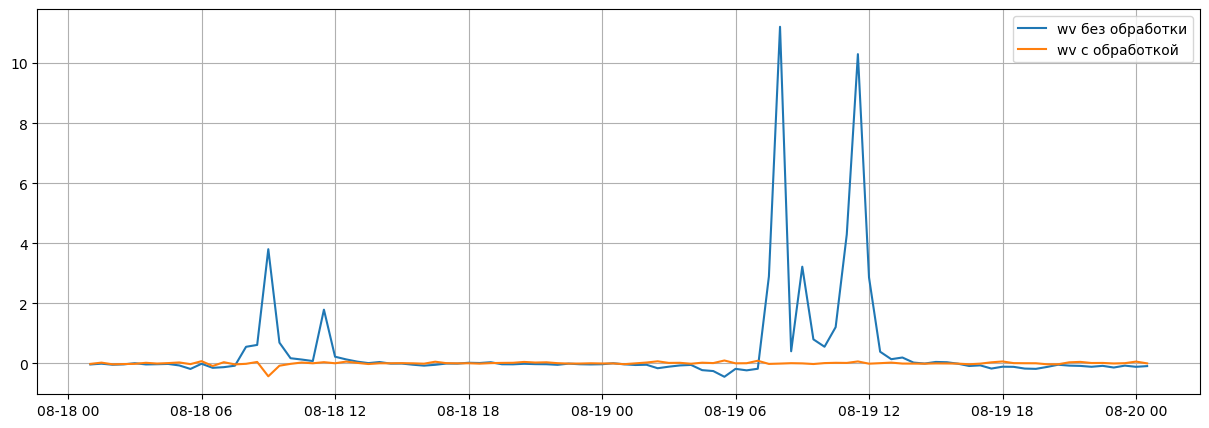

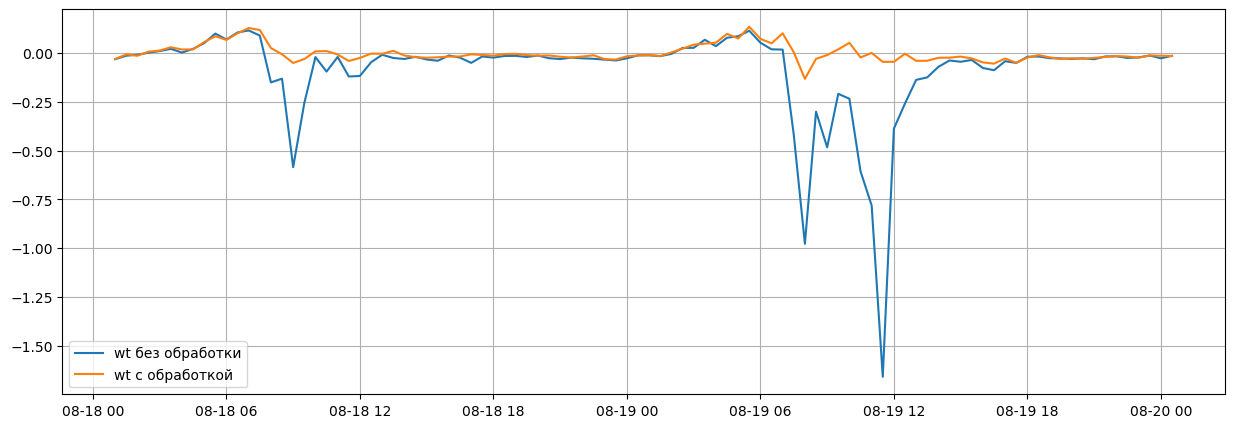

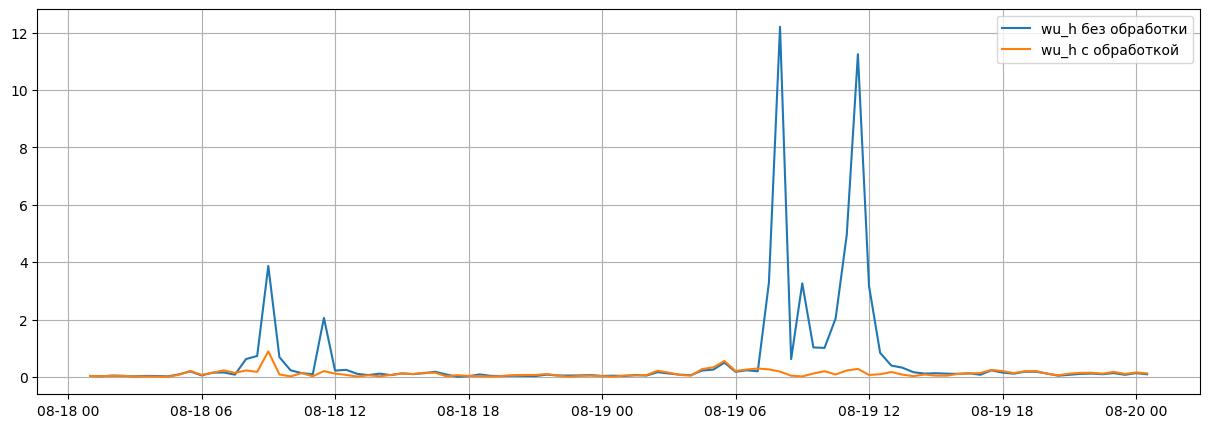

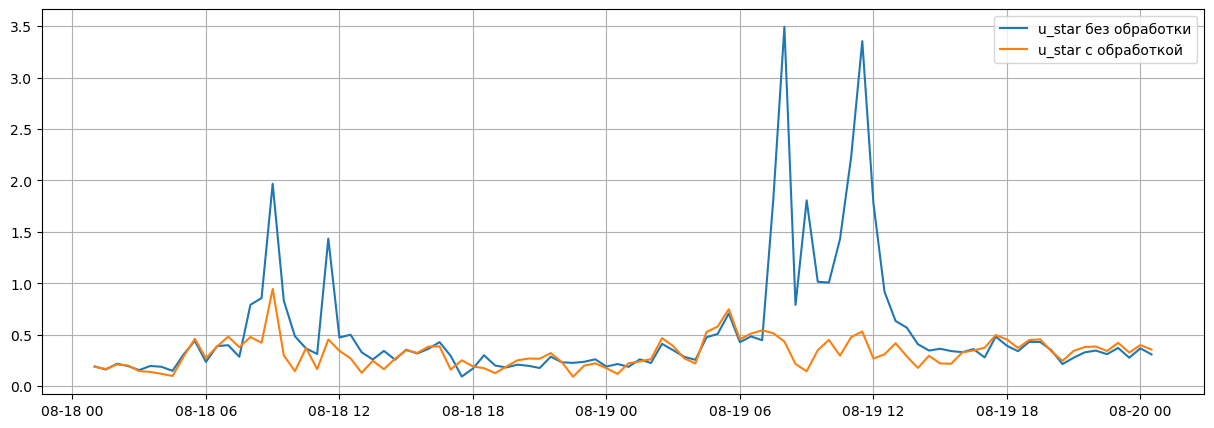

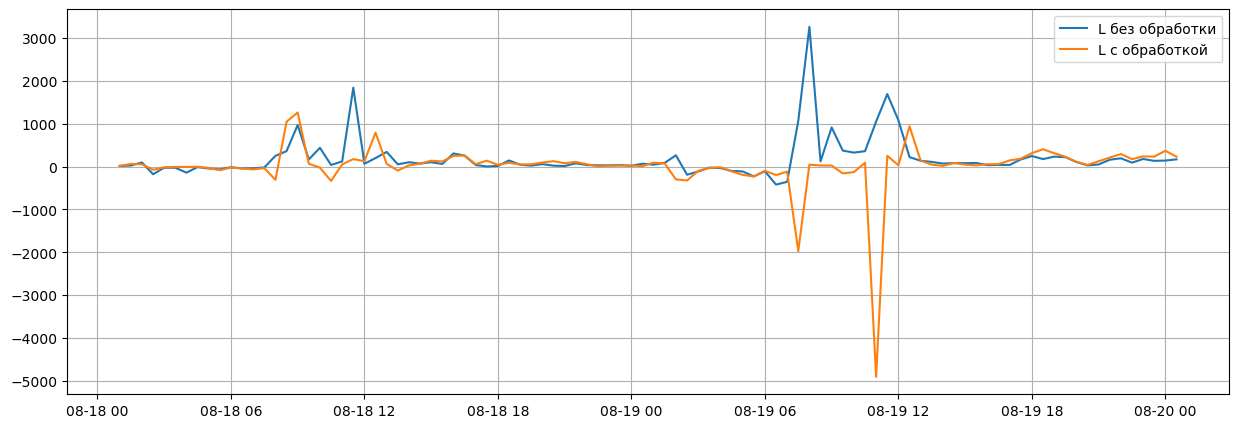

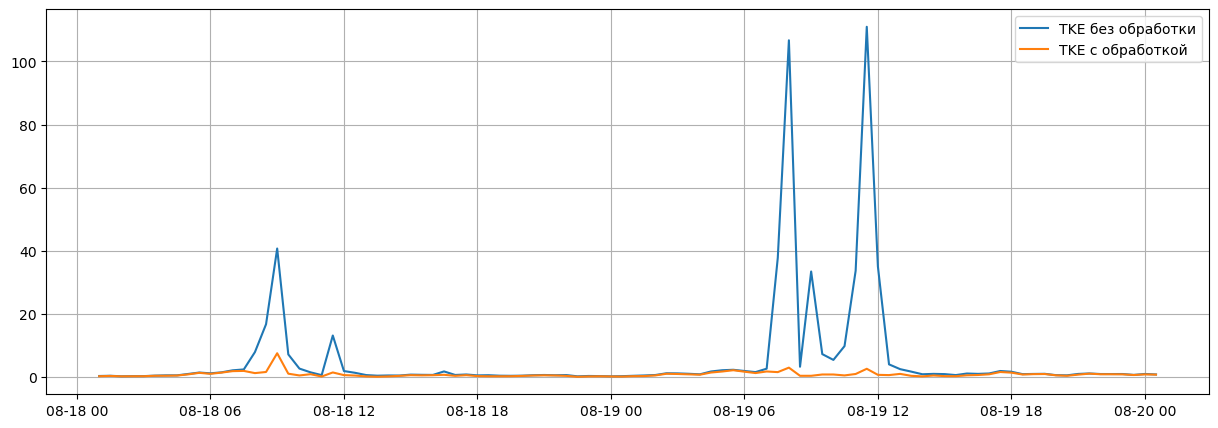

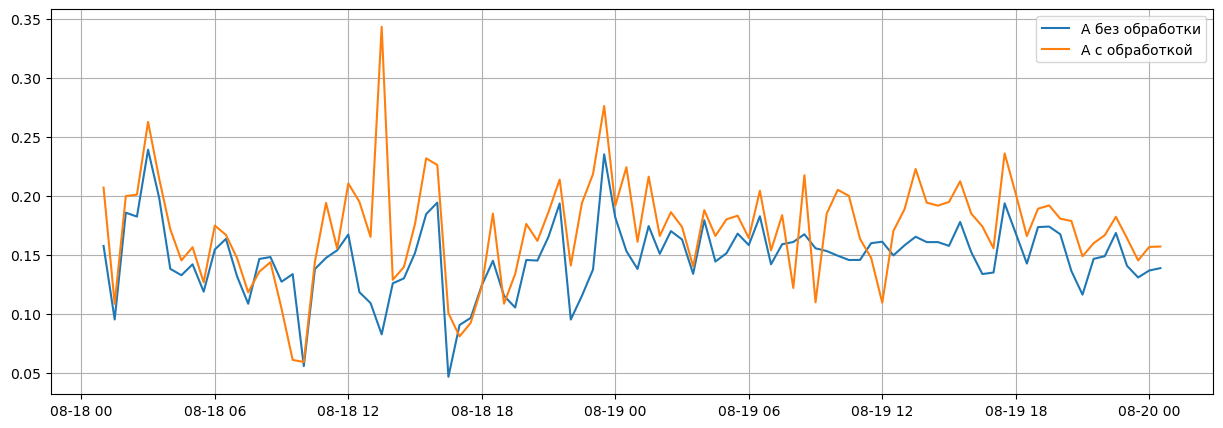

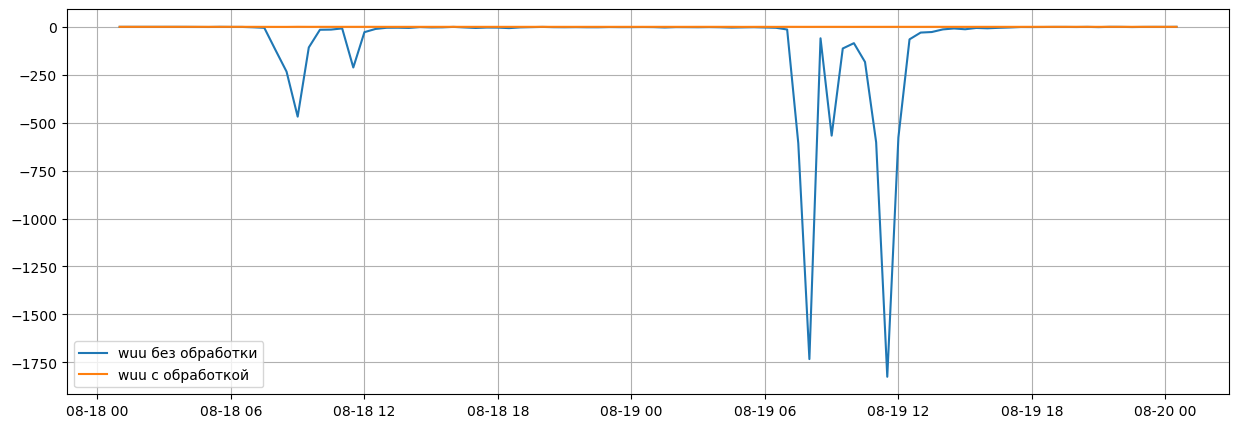

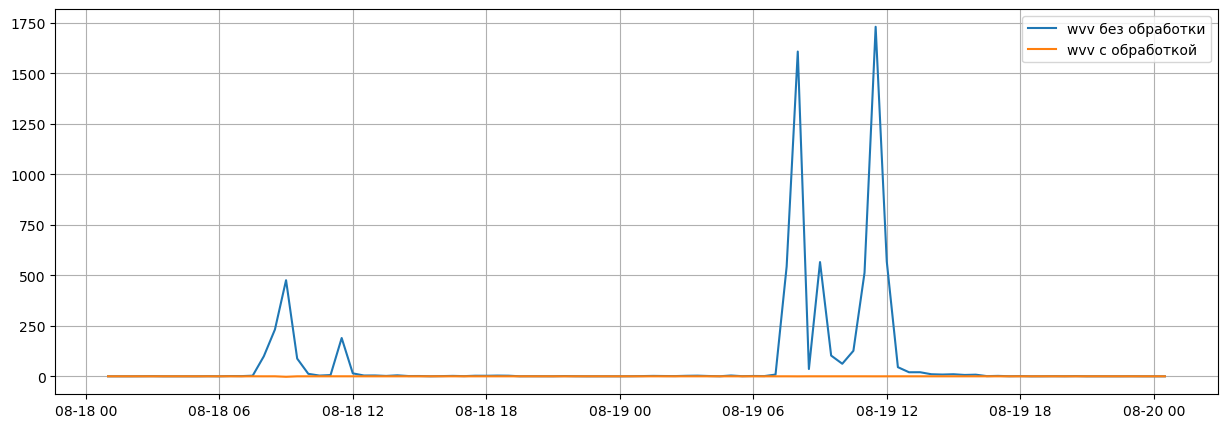

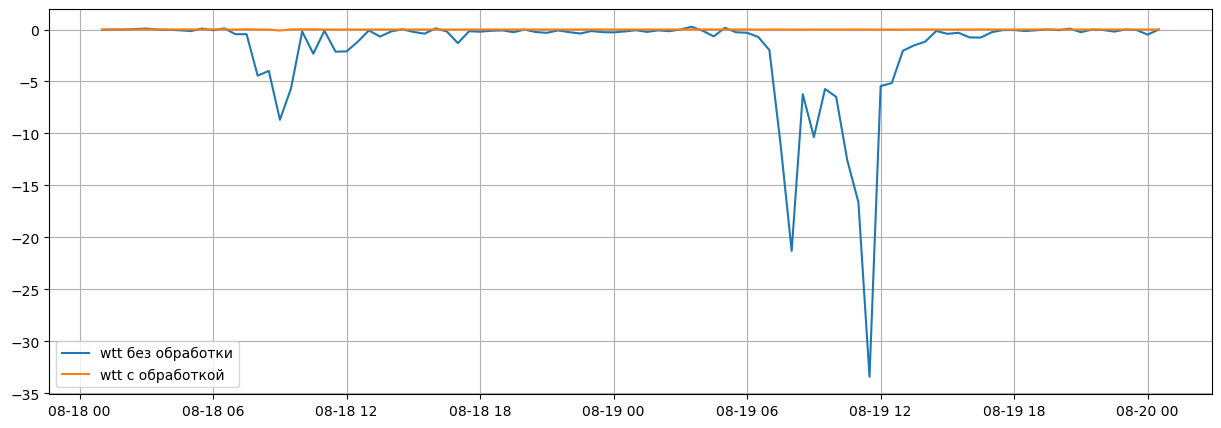

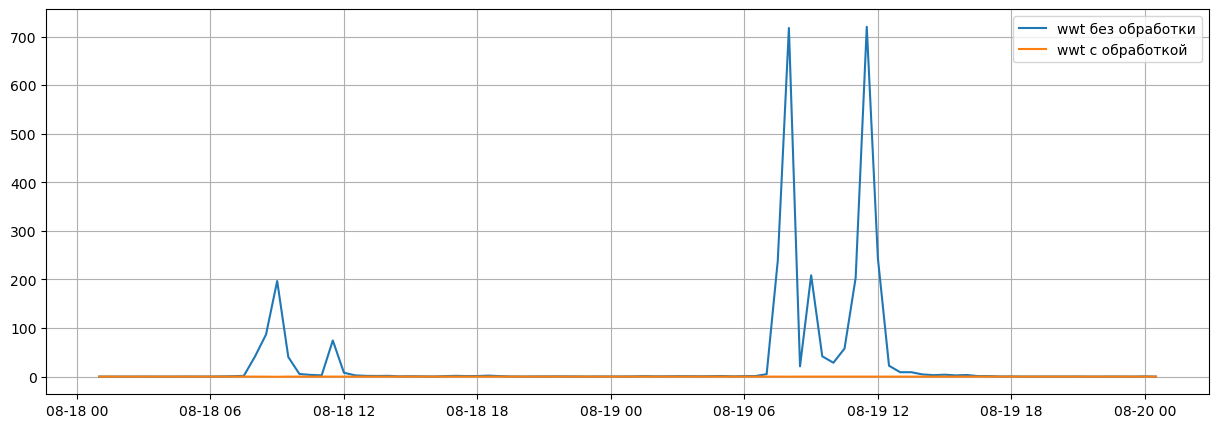

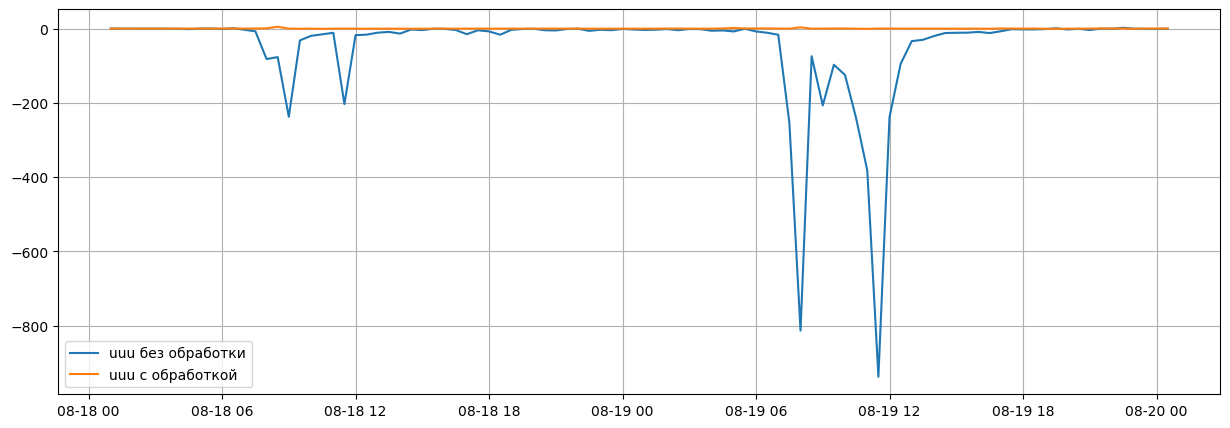

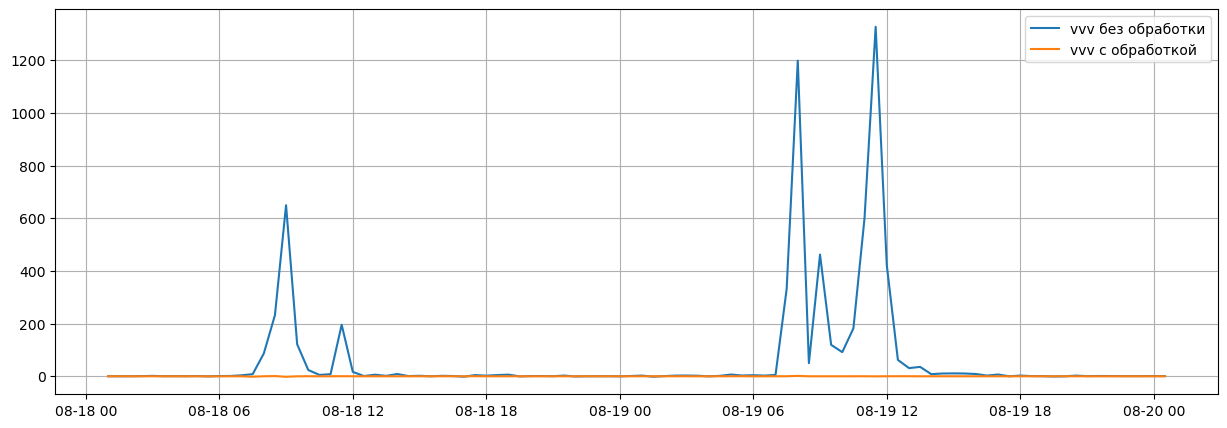

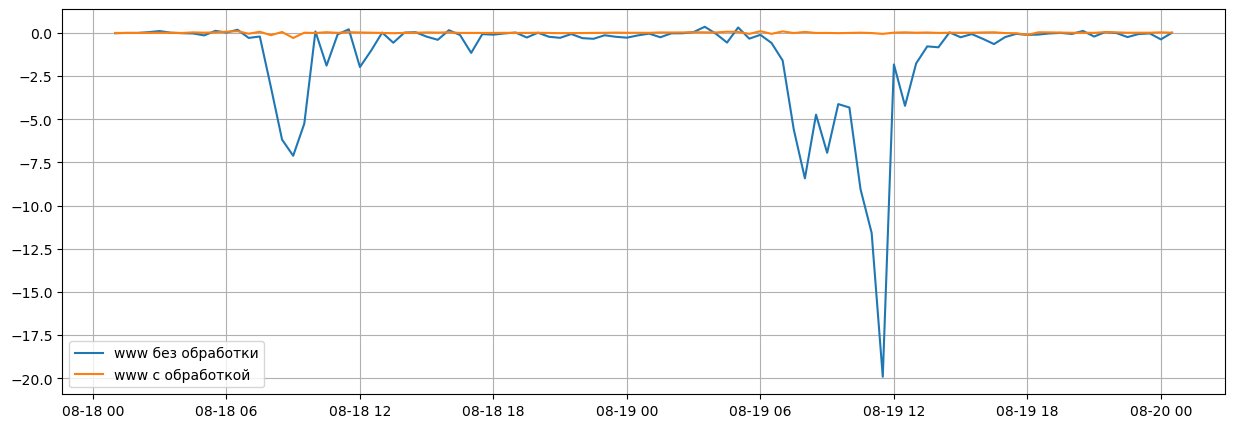

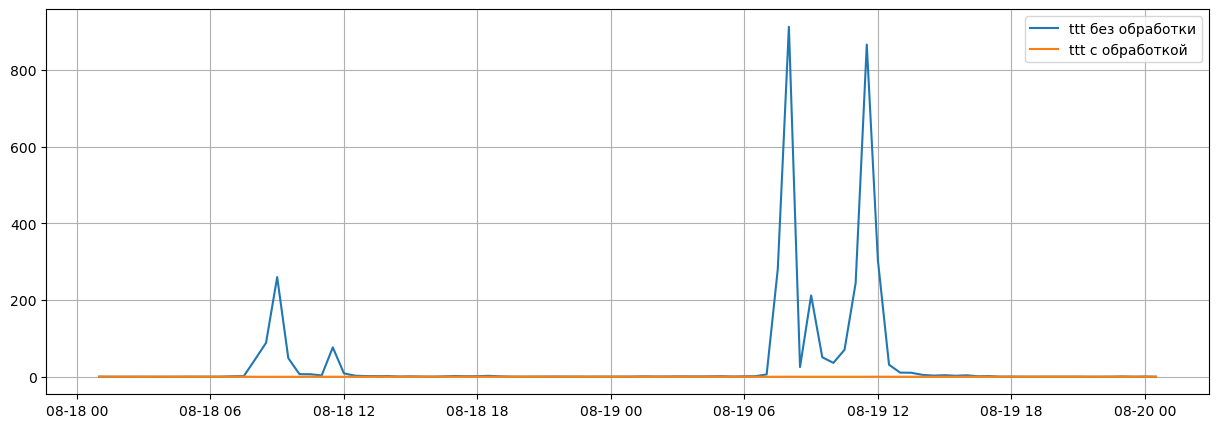

In [7]:
for var_name in df1_moments:
    plt.figure(figsize=(15,5))
    plt.plot(df_moments[var_name], label = f'{var_name} без обработки')
    plt.plot(df1_moments[var_name], label = f'{var_name} с обработкой')
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()